![Bluemetrica](../bluemetrica_large.png)

# Ćwiczenie: problem regresji (prognozujemy ceny domów)

Wczytujemy biblioteki:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Wczytujemy dane

In [2]:
df = pd.read_csv("../house data/train.csv", index_col = 0)

### About the dataset

*source: kaggle.com*

Set contains data about home prices in one of the towns in Iowa

-	**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
-	**MSSubClass**: The building class
-	**MSZoning**: The general zoning classification
-	**LotFrontage**: Linear feet of street connected to property
-	**LotArea**: Lot size in square feet
-	**Street**: Type of road access
-	**Alley**: Type of alley access
-	**LotShape**: General shape of property
-	**LandContour**: Flatness of the property
-	**Utilities**: Type of utilities available
-	**LotConfig**: Lot configuration
-	**LandSlope**: Slope of property
-	**Neighborhood**: Physical locations within Ames city limits
-	**Condition1**: Proximity to main road or railroad
-	**Condition2**: Proximity to main road or railroad (if a second is present)
-	**BldgType**: Type of dwelling
-	**HouseStyle**: Style of dwelling
-	**OverallQual**: Overall material and finish quality
-	**OverallCond**: Overall condition rating
-	**YearBuilt**: Original construction date
-	**YearRemodAdd**: Remodel date
-	**RoofStyle**: Type of roof
-	**RoofMatl**: Roof material
-	**Exterior1st**: Exterior covering on house
-	**Exterior2nd**: Exterior covering on house (if more than one material)
-	**MasVnrType**: Masonry veneer type
-	**MasVnrArea**: Masonry veneer area in square feet
-	**ExterQual**: Exterior material quality
-	**ExterCond**: Present condition of the material on the exterior
-	**Foundation**: Type of foundation
-	**BsmtQual**: Height of the basement
-	**BsmtCond**: General condition of the basement
-	**BsmtExposure**: Walkout or garden level basement walls
-	**BsmtFinType1**: Quality of basement finished area
-	**BsmtFinSF1**: Type 1 finished square feet
-	**BsmtFinType2**: Quality of second finished area (if present)
-	**BsmtFinSF2**: Type 2 finished square feet
-	**BsmtUnfSF**: Unfinished square feet of basement area
-	**TotalBsmtSF**: Total square feet of basement area
-	**Heating**: Type of heating
-	**HeatingQC**: Heating quality and condition
-	**CentralAir**: Central air conditioning
-	**Electrical**: Electrical system
-	**1stFlrSF**: First Floor square feet
-	**2ndFlrSF**: Second floor square feet
-	**LowQualFinSF**: Low quality finished square feet (all floors)
-	**GrLivArea**: Above grade (ground) living area square feet
-	**BsmtFullBath**: Basement full bathrooms
-	**BsmtHalfBath**: Basement half bathrooms
-	**FullBath**: Full bathrooms above grade
-	**HalfBath**: Half baths above grade
-	**Bedroom**: Number of bedrooms above basement level
-	**Kitchen**: Number of kitchens
-	**KitchenQual**: Kitchen quality
-	**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
-	**Functional**: Home functionality rating
-	**Fireplaces**: Number of fireplaces
-	**FireplaceQu**: Fireplace quality
-	**GarageType**: Garage location
-	**GarageYrBlt**: Year garage was built
-	**GarageFinish**: Interior finish of the garage
-	**GarageCars**: Size of garage in car capacity
-	**GarageArea**: Size of garage in square feet
-	**GarageQual**: Garage quality
-	**GarageCond**: Garage condition
-	**PavedDrive**: Paved driveway
-	**WoodDeckSF**: Wood deck area in square feet
-	**OpenPorchSF**: Open porch area in square feet
-	**EnclosedPorch**: Enclosed porch area in square feet
-	**3SsnPorch**: Three season porch area in square feet
-	**ScreenPorch**: Screen porch area in square feet
-	**PoolArea**: Pool area in square feet
-	**PoolQC**: Pool quality
-	**Fence**: Fence quality
-	**MiscFeature**: Miscellaneous feature not covered in other categories
-	**MiscVal**: $Value of miscellaneous feature
-	**MoSold**: Month Sold
-	**YrSold**: Year Sold
-	**SaleType**: Type of sale
-	**SaleCondition**: Condition of sale


### Oglądamy dane, sprawdzamy brakujące wartości

In [3]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
df.shape

(1460, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Ile % danych brakuje?

In [6]:
df.isnull().mean().sort_values(ascending = False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageYrBlt      0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
RoofMatl         0.000000
Exterior1st      0.000000
RoofStyle        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
YearBuilt        0.000000
ExterCond        0.000000
Foundation       0.000000
YearRemodAdd     0.000000
SalePrice        0.000000
OverallCond      0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

Prawie połowa domów nie ma informacji o jakości kominka. Czyżby po prostu nie mieli kominków?
Do sprawdzenia później:
1. Zobaczyć czy braki w FireplaceQu są tylko dla domów bez kominka

In [7]:
# Usuwamy zmienny gdzie brakuje ponad 60% obserwacji
df.dropna(axis = 1, thresh = np.floor(df.shape[0]*0.4), inplace = True)

In [8]:
df.shape

(1460, 76)

## Plot misisng values

Rysujemy heatmapę brakujących wartości (isnull() True/False). Taka heatmapa pozwala nam zobaczyć wzorce w brakach danych. Np. to że jak dom nie ma informacji o rodzaju garażu to nie ma też o jego wykończeniu i jakości. Pozwala nam to wnioskować, że: 
- albo ten dom po prostu nie ma garażu i stąd brakuje tych wszystkich informacji
- albo te informacje były zbierane wspólnie (np. cała strona formularza, którą się skleiła i osoba ją przeoczyła)

Sprawdzimy to w kolejnych krokach

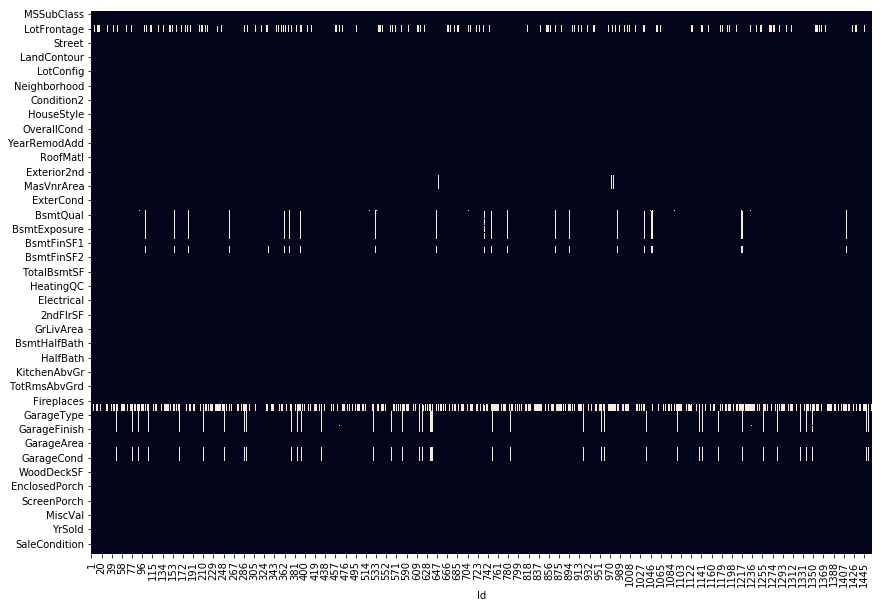

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(np.transpose(df.isnull()), cbar = False) # cbar - legenda koloru (skala)

Grupujemy dane wg. liczby kominków w domu i sprawdzamy jak wyglądają braki w danych.

Widać że dla wszystkich domów bez kominków nie ma informacji o jakości kominka. Wniosek jest jasne - NA oznacza tu brak kominka.

In [10]:
# skorzstamy z apply i wyrażenia lambda żeby policzyć braki w danych per kominki
df.groupby('Fireplaces').apply(lambda x: x.isnull().mean())['FireplaceQu']

Fireplaces
0    1.0
1    0.0
2    0.0
3    0.0
Name: FireplaceQu, dtype: float64

In [11]:
df['FireplaceQu'].value_counts() # zliczamy wystąpienia kategorii

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
# dodajemy nową kategorię zamiast NA - Brak
df['FireplaceQu']  = df['FireplaceQu'].fillna("Brak") 

In [13]:
# Powtarzamy ćwiczenie dla garażu - wniosek jest ten sam
df.groupby('GarageArea').apply(lambda x: x.isnull().mean())['GarageQual']

GarageArea
0       1.0
160     0.0
164     0.0
180     0.0
186     0.0
189     0.0
192     0.0
198     0.0
200     0.0
205     0.0
208     0.0
210     0.0
213     0.0
216     0.0
220     0.0
225     0.0
228     0.0
230     0.0
234     0.0
240     0.0
244     0.0
246     0.0
248     0.0
250     0.0
252     0.0
254     0.0
255     0.0
256     0.0
260     0.0
261     0.0
       ... 
895     0.0
898     0.0
900     0.0
902     0.0
905     0.0
908     0.0
912     0.0
923     0.0
924     0.0
928     0.0
936     0.0
947     0.0
954     0.0
968     0.0
983     0.0
995     0.0
1014    0.0
1020    0.0
1025    0.0
1043    0.0
1052    0.0
1053    0.0
1069    0.0
1134    0.0
1166    0.0
1220    0.0
1248    0.0
1356    0.0
1390    0.0
1418    0.0
Name: GarageQual, Length: 441, dtype: float64

Rok budowy garażu - histogram i scatterplot

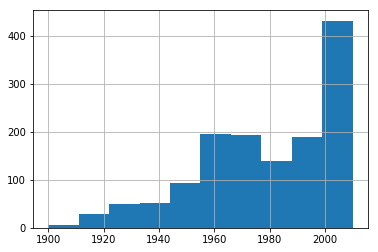

In [14]:
df['GarageYrBlt'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


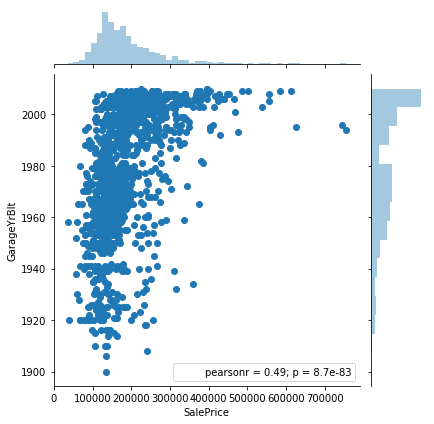

In [15]:
sns.jointplot(x = 'SalePrice', y = 'GarageYrBlt', data = df)

Wniosek: Nowszy garaż -> droższy dom

Ponieważ jest to zmienna liczbowa nie możemy zamiast NA zapisać "Brak". Musimy dodac liczbę.
W takim razie, gdy ktoś nie ma garażu rok budowy zapiszemy jako 0. 

In [16]:
# zakodujemy brak garazu jako 0 rok budowy

df['GarageYrBlt'].fillna(0, inplace = True)

Czy są jeszcze braki?

In [17]:
df.isnull().mean().sort_values(ascending = False)

LotFrontage      0.177397
GarageType       0.055479
GarageFinish     0.055479
GarageCond       0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Exterior2nd      0.000000
RoofMatl         0.000000
Exterior1st      0.000000
ExterQual        0.000000
YearRemodAdd     0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtFinSF1       0.000000
RoofStyle        0.000000
SalePrice        0.000000
YearBuilt        0.000000
LotConfig        0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
                   ...   
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
Fireplaces       0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal     

Jeszcze zostaly nam MasVnrArea, Electrical, LotFrontage

In [18]:
df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']), inplace = True)

In [19]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [20]:
# brakuje jednej obserwacji - wstawimy najczęsciej występującą wartość, inaczej dominantę albo modę
df['Electrical'].fillna(df['Electrical'].mode(), inplace = True)

#### Braki w zmiennej lot frontage

Lot frontage to szerokość działki tam gdzie przylega ona do ulicy:
![Lot frontage](./lot_frontage.png)

Każda działka ma jakąś szerokość, NA to brak tej informacji. Możemy wstawić zamiast NA średnią szerokość lub próbować zbudować prosty model regresji liniowej wyjaśniający szerokość działki w zależności od powierzchni działki, dzielnicy i wielkości domu. 

Teraz już zostały nam tylko zmienne do których chemy wstawić słowo "Brak"

In [22]:
df.fillna("Brak", inplace = True)

Czy zostały nam jeszcze jakies braki w danych?

In [23]:
df.isnull().sum().sum()

0

## Wizualizacja i przekodowanie typów danych

- Czy rok/miesiąc sprzedaży ma wpływ na cenę? SalePrice YrSold i MoSold
- W którym miesiącu sprzedaje się najwięcej domów?
- Czy MSSubClass jest monotoniczne? 
- Czy dzielnica ma wpływ na cenę?

In [24]:
# Korelogram w postaci klastermapy
plt.figure(figsize = (15,15))
sns.clustermap(df.corr(), cmap = "coolwarm", center = 0)

<Figure size 1080x1080 with 0 Axes>

In [25]:
plt.title("Miesiąc sprzedaży domu a cena")
sns.boxplot(x = 'MoSold', y = "SalePrice", data = df)

Text(0.5,1,'Liczba transakcji w danym miesiącu')

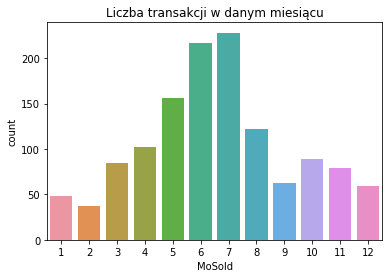

In [26]:
sns.countplot(x = "MoSold", data = df[df["YrSold"]!= 2010]) # z wyłączeniem 2010
plt.title("Liczba transakcji w danym miesiącu")

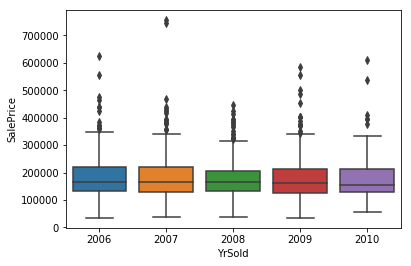

In [27]:
plt.title("Rok sprzedaży domu a cena")
sns.boxplot(x = 'YrSold', y = "SalePrice", data = df)

In [28]:
# widzimy że ta zmienna nie jest monotoniczna. Warto przekodować ją na zmienną kategorii
plt.figure(figsize = (12,8))
sns.boxplot(x = 'MSSubClass', y = "SalePrice", data = df)
plt.title("Zmienna MSSubClass a cena")

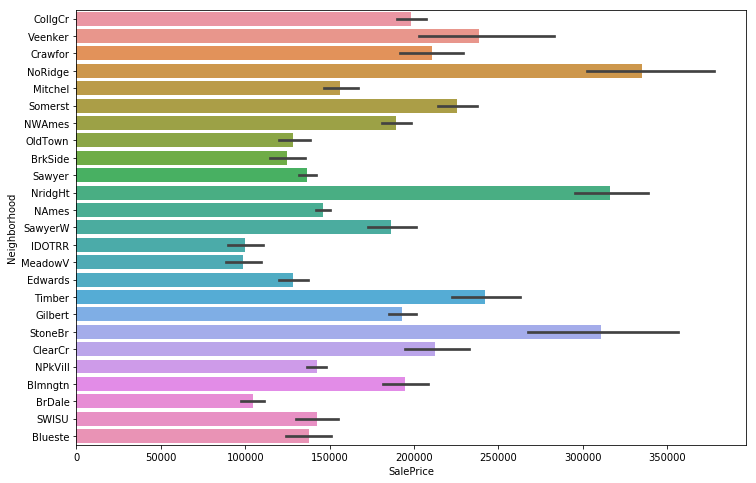

In [29]:
plt.figure(figsize = (12,8))
sns.barplot(y = 'Neighborhood', x = "SalePrice", data = df)
plt.title("Dzielnica domu a cena sprzedaży")

Zgodnie z naszą intuicją wraz ze wzrostem powierzchni rośnie cena domu. Korelacja jest silna.
Warto przyjrzeć się wartościom odstającym - dwa bardzo drogie i duże domy zostawimy w danych. Dwa ogromne domy sprzedane wyjątkowo tanio usuniemy.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


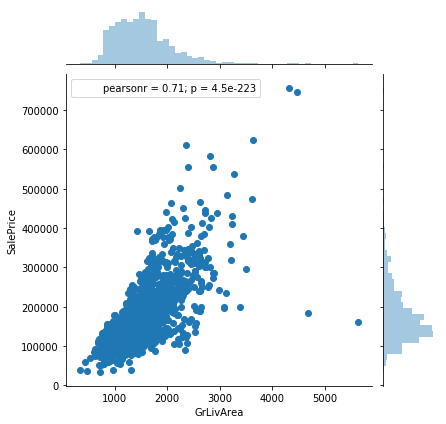

In [30]:
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = df)
plt.title("Powierzchnia domu a cena sprzedaży")

In [31]:
# usuwamy wartości odstające
df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index, inplace = True)

In [35]:
df['MSSubClass'] = df['MSSubClass'].astype('str') # przekodowanie na string

## H2O

H2O zbudowane jest w Javie, ofertuje interfejs do Pythona, R, Sparka, Javy,...
Jest to bardzo szybkie i dobrze przemyślane narzędzie. Warto korzystać z H2O do budowy modeli lasów losowych, GBM oraz sieci neuronowych. 

Dokumentacja:
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

Aby działało nam h2o musimy mieć na naszym komputerze zainstalowaną javę (przy 64bitowym systemie najlepiej 64bitową).
Dodatkowo instalujemy         
`conda install -c anaconda h2o `
oraz           
`conda install -c anaconda h2o-py `

In [36]:
import h2o

In [38]:
# łaczymy się z klastrem h2o w javie
h2o.init(max_mem_size = '8G') # ile ramu przeznaczamy

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O cluster uptime:         40 secs
H2O cluster version:        3.10.4.8
H2O cluster version age:    1 year, 3 months and 9 days !!!
H2O cluster name:           H2O_from_python_ewaru_8c1qyq
H2O cluster total nodes:    1
H2O cluster free memory:    7.095 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
Python version:             3.6.6 final
--------------------------  -------------------------------

## Zbiór treningowy, testowy i walidacyjny

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [41]:
# podział na zbiór treningowy i walidacyjny
df_train, df_val = train_test_split(df_train, test_size = 0.1)

In [42]:
from h2o.estimators import H2ORandomForestEstimator, H2OGradientBoostingEstimator

In [43]:
train = h2o.H2OFrame(df_train)
test = h2o.H2OFrame(df_test)
val = h2o.H2OFrame(df_val)

C:\ProgramData\Anaconda3\lib\site-packages\h2o\utils\shared_utils.py:162: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
# Po informacje na temat modeli można sięgnąć do pomocy, ale wygodniej przegląda się dokumnetację na stronie h2o
help(H2ORandomForestEstimator)

Help on class H2ORandomForestEstimator in module h2o.estimators.random_forest:

class H2ORandomForestEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Distributed Random Forest
 |  
 |  Method resolution order:
 |      H2ORandomForestEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.utils.backward_compatibility.BackwardsCompatibleBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Construct a new model instance.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  balance_classes
 |      Balance training data class counts via over/under-sampling (for imbalanced data).
 |      
 |      Type: ``bool``  (default: ``False``).
 |  
 |  binomial_double_trees
 |      For binary classification: Build 2x as many trees (one per class) - can lead to higher accuracy.
 |      
 |      Type: ``bool``  (default: 

In [45]:
X = df.drop('SalePrice', axis = 1).columns
X = list(X)

## Model Random Forest

In [165]:
model_rf = H2ORandomForestEstimator(ntrees = 200, # ile drzew budujemy
                                   max_depth = 10, # maksymalna głębokość drzew
                                   mtries = -1,   # ile zmiennych jest rozważanych przy podziale, -1 to wart. domyślna
                                   sample_rate = 0.632, # ile obserwacji losujemy do budowy drzewa
                                   stopping_rounds = 100) # wcześniejsze zatrzymanie modelu jeśli błąd się nie zmniejsza

model_rf.train(x = X,
               y = 'SalePrice',
               training_frame = train,
               validation_frame = val)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [166]:
# Wyniki modelu
model_rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1535635692612_4


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 656806101.4668752
RMSE: 25628.22860571669
MAE: 16209.668287088354
RMSLE: 0.13540897669266938
Mean Residual Deviance: 656806101.4668752

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 939305670.9563646
RMSE: 30648.094083586417
MAE: 16807.17637520032
RMSLE: 0.16886127002851403
Mean Residual Deviance: 939305670.9563646
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2018-08-30 15:54:21  0.053 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2018-08-30 15:54:21  0.088 sec   1.0                41338.1694310586    28718.19525065963   1708844251.9109077   44038.01444630918   29709.07171474359   1939346716.3733358
     2018-08-30 15:54:21  0.132 sec   2.0                39102.799148635     27205.235170361248  1529028901.25849     31669.743845649187  21265.68656517094   1002972675.2490346
     2018-08-30 15:54:21  0.168 sec   3.0                40213.826015257415  27732.361135319836  1617151802.7853942   31673.585898226447  21410.57035701568   1003216043.6523293
     2018-08-30 15:54:21  0.191 sec   4.0                37978.465135124374  25785.801660793055  1442363814.019858    30585.602179672864  19424.942791800215  935479060.6932094
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2018-08-30 15:54:25  3.965 sec   144.0              25659.968888134892  16258.06997467723   658434003.3400506    30372.797978774754  16621.828517526188  922506857.0594637
     2018-08-30 15:54:25  3.991 sec   145.0              25701.031818452975  16274.893393862929  660543036.5331323    30360.631622649656  16621.79115803677   921767952.5262343
     2018-08-30 15:54:25  4.022 sec   146.0              25740.906372613852  16289.476303098534  662594260.8836724    30316.558659713373  16623.657857366296  919093728.967842
     2018-08-30 15:54:25  4.050 sec   147.0              25736.91735468375   16295.57335891299   662388914.9218215    30305.163454149133  16635.352677890067  918402931.9826962
     2018-08-30 15:54:28  6.945 sec   200.0              25628.22860571669   16209.668287088354  656806101.4668752    30648.094083586417  16807.17637520032   939305670.9563646


See the whole table with table.as_data_frame()
Variable Importances: 


variable      relative_importance    scaled_importance       percentage
------------  ---------------------  ----------------------  ----------------------
OverallQual   255419507277824.0      1.0                     0.2765473994912301
ExterQual     114363310538752.0      0.447746970298385       0.12382326026609541
GrLivArea     106500760535040.0      0.41696408261878515     0.11531033272947144
Neighborhood  98878317658112.0       0.38712124501344536     0.10705737359627564
KitchenQual   41432295407616.0       0.1622127293611502      0.044859508469200796
---           ---                    ---                     ---
MiscVal       55569551360.0          0.00021756189240297957  6.0166175572434805e-05
Condition2    34239942656.0          0.00013405374953901487  3.707221582706324e-05
Street        8008754176.0           3.13552956912126e-05    8.671225483683415e-06
PoolArea      6156312576.0           2.410275018385216e-05   6.665552883931082e-06
Utilities     5143255040.0           2.0136500515622704e-05  5.568696852449272e-06


See the whole table with table.as_data_frame()


##### Jak przebiegało uczenie modelu?

Ten wykres pozwala nam monitorować uczenie modelu. Czy model jest przeuczony i błąd na zbiorze walidacyjnym zaczął rosnąć? A może model uczył się za krótko?

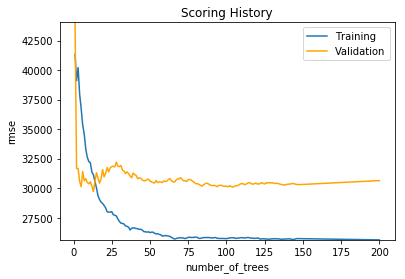

In [167]:
model_rf.plot()

In [168]:
# sprawdzamy model na danych testowych
model_rf.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 1053429795.6890033
RMSE: 32456.583241139284
MAE: 17673.924586031142
RMSLE: 0.13102054607583227
Mean Residual Deviance: 1053429795.6890033


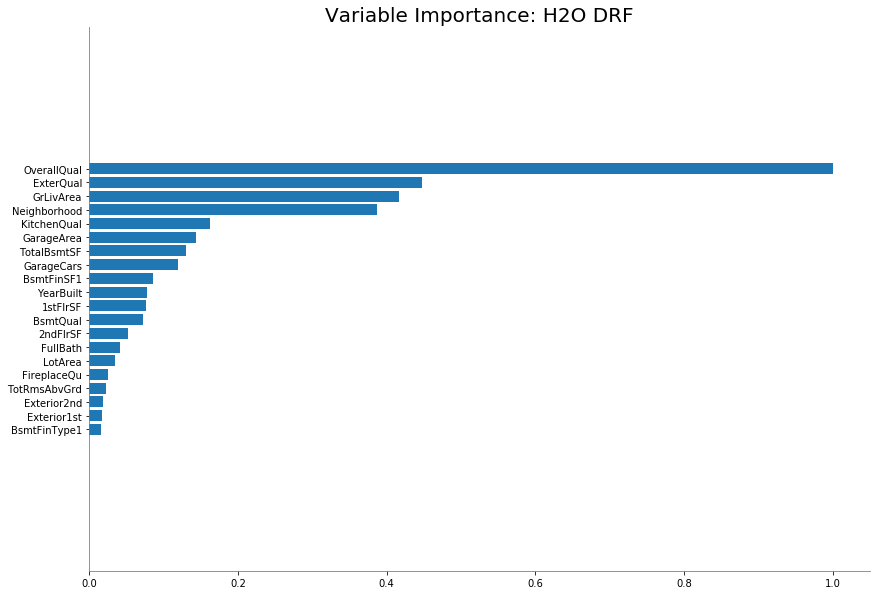

In [169]:
# 20 najważniejszych zmiennych
model_rf.varimp_plot(20)

In [64]:
# Predykcje z modelu
pred_rf = model_rf.predict(test)
pred_rf = pred_rf.as_data_frame() # obiekt H2OFrame zamieniamy na DataFrame

drf prediction progress: |████████████████████████████████████████████████| 100%


## Wykres Predicted vs Actuals

Oglądamy nasze prognozy vs faktyczne dane. Obserwacje leżące na czerwonej linii to obserwacje poprawnie wyprognozowane. Dzieki temu możemy zobaczyć jakie problemy ma model. W tym wypadku nasz model niedoszacowuje cen najdroższych domów.

In [187]:
plt.scatter(pred_rf.values, df_test['SalePrice'])
plt.plot([0,700000], [0,700000], 'r--')
plt.title("Predicted vs Actuals")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

plt.grid() # dodaję siatkę żeby było lepiej widać

## Zapisujemy model do późniejszego wykorzystania

In [188]:
# h2o.save_model(model_rf, path= "tmp/mymodel")

'C:\\Users\\ewaru\\Documents\\Python\\Machine Learning z Python\\Szkolenie ML z Python 29-31.08\\Materiały dla uczestników puste\\6. Decision trees\\tmp\\mymodel\\DRF_model_python_1535635692612_4'

#### Wczytujemy model

In [47]:
# model_rf = h2o.load_model("./tmp/mymodel/DRF_model_python_1535635692612_4")

In [48]:
# model_rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1535635692612_4


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 656806101.4668752
RMSE: 25628.22860571669
MAE: 16209.668287088354
RMSLE: 0.13540897669266938
Mean Residual Deviance: 656806101.4668752

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 939305670.9563646
RMSE: 30648.094083586417
MAE: 16807.17637520032
RMSLE: 0.16886127002851403
Mean Residual Deviance: 939305670.9563646
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2018-08-30 15:54:21  0.053 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2018-08-30 15:54:21  0.088 sec   1.0                41338.1694310586    28718.19525065963   1708844251.9109077   44038.01444630918   29709.07171474359   1939346716.3733358
     2018-08-30 15:54:21  0.132 sec   2.0                39102.799148635     27205.235170361248  1529028901.25849     31669.743845649187  21265.68656517094   1002972675.2490346
     2018-08-30 15:54:21  0.168 sec   3.0                40213.826015257415  27732.361135319836  1617151802.7853942   31673.585898226447  21410.57035701568   1003216043.6523293
     2018-08-30 15:54:21  0.191 sec   4.0                37978.465135124374  25785.801660793055  1442363814.019858    30585.602179672864  19424.942791800215  935479060.6932094
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2018-08-30 15:54:25  3.965 sec   144.0              25659.968888134892  16258.06997467723   658434003.3400506    30372.797978774754  16621.828517526188  922506857.0594637
     2018-08-30 15:54:25  3.991 sec   145.0              25701.031818452975  16274.893393862929  660543036.5331323    30360.631622649656  16621.79115803677   921767952.5262343
     2018-08-30 15:54:25  4.022 sec   146.0              25740.906372613852  16289.476303098534  662594260.8836724    30316.558659713373  16623.657857366296  919093728.967842
     2018-08-30 15:54:25  4.050 sec   147.0              25736.91735468375   16295.57335891299   662388914.9218215    30305.163454149133  16635.352677890067  918402931.9826962
     2018-08-30 15:54:28  6.945 sec   200.0              25628.22860571669   16209.668287088354  656806101.4668752    30648.094083586417  16807.17637520032   939305670.9563646


See the whole table with table.as_data_frame()
Variable Importances: 


variable      relative_importance    scaled_importance       percentage
------------  ---------------------  ----------------------  ----------------------
OverallQual   255419507277824.0      1.0                     0.2765473994912301
ExterQual     114363310538752.0      0.447746970298385       0.12382326026609541
GrLivArea     106500760535040.0      0.41696408261878515     0.11531033272947144
Neighborhood  98878317658112.0       0.38712124501344536     0.10705737359627564
KitchenQual   41432295407616.0       0.1622127293611502      0.044859508469200796
---           ---                    ---                     ---
MiscVal       55569551360.0          0.00021756189240297957  6.0166175572434805e-05
Condition2    34239942656.0          0.00013405374953901487  3.707221582706324e-05
Street        8008754176.0           3.13552956912126e-05    8.671225483683415e-06
PoolArea      6156312576.0           2.410275018385216e-05   6.665552883931082e-06
Utilities     5143255040.0           2.0136500515622704e-05  5.568696852449272e-06


See the whole table with table.as_data_frame()


## Model Gradient Boosting

In [49]:
help(H2OGradientBoostingEstimator)

Help on class H2OGradientBoostingEstimator in module h2o.estimators.gbm:

class H2OGradientBoostingEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Gradient Boosting Machine
 |  
 |  Builds gradient boosted trees on a parsed data set, for regression or classification.
 |  The default distribution function will guess the model type based on the response column type.
 |  Otherwise, the response column must be an enum for "bernoulli" or "multinomial", and numeric
 |  for all other distributions.
 |  
 |  Method resolution order:
 |      H2OGradientBoostingEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.utils.backward_compatibility.BackwardsCompatibleBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Construct a new model instance.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  balance_classe

In [56]:
model_gb = H2OGradientBoostingEstimator(ntrees = 3000, # ile drzew budujemy
                                   max_depth = 10, # maksymalna głębokość drzew
                                   learn_rate = 0.001, # szybkość uczenia, czasem zapisywane jako eta
                                   sample_rate = 0.632, # ile obserwacji losujemy do budowy drzewa
                                   stopping_rounds = 100) # wcześniejsze zatrzymanie modelu jeśli błąd się nie zmniejsza

model_gb.train(x = X,
               y = 'SalePrice',
               training_frame = train,
               validation_frame = val)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [57]:
model_gb

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1535695737571_3


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 276358740.9238159
RMSE: 16624.04105275898
MAE: 8846.257309789085
RMSLE: 0.08136135309479506
Mean Residual Deviance: 276358740.9238159

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 440395524.65739185
RMSE: 20985.60279471123
MAE: 15135.379999629173
RMSLE: 0.1140416584703127
Mean Residual Deviance: 440395524.65739185
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2018-08-31 08:34:45  0.062 sec   0.0                81022.90702426907   57686.459301654744  6564711462.663349    64555.627213111824  54043.13334636975   4167429004.8782635
     2018-08-31 08:34:45  0.089 sec   1.0                80951.36192898008   57632.475005958055  6553122998.156727    64499.34508334383   53998.64748176511   4160165516.1802707
     2018-08-31 08:34:45  0.107 sec   2.0                80882.68049309048   57580.136454361294  6542008003.747359    64448.622393321166  53956.03026968864   4153624928.3968987
     2018-08-31 08:34:45  0.125 sec   3.0                80816.38204043779   57528.4758400858    6531287606.105997    64389.312235464946  53905.74449781742   4145983530.156196
     2018-08-31 08:34:45  0.148 sec   4.0                80747.83832060614   57476.376057554815  6520213393.450748    64332.83231856398   53859.712613130854  4138713314.1284704
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2018-08-31 08:35:05  20.080 sec  1724.0             25545.156072974525  14738.599395257388  652554998.7926273    23824.0197718879    18256.353849930125  567583918.0913056
     2018-08-31 08:35:09  24.080 sec  2101.0             21719.25173170613   12042.351495471878  471725895.78521967   21788.21657399011   16366.838718330142  474726381.47509736
     2018-08-31 08:35:13  28.087 sec  2455.0             19200.62705565905   10398.382343303147  368664079.33050627   21086.164569084067  15373.007865719344  444626336.2344963
     2018-08-31 08:35:17  32.096 sec  2813.0             17374.458686857095  9281.263234330314   301871814.661304     20956.106173099455  15146.491672244094  439158385.93821716
     2018-08-31 08:35:19  34.289 sec  3000.0             16624.04105275898   8846.257309789085   276358740.9238159    20985.60279471123   15135.379999629173  440395524.65739185


See the whole table with table.as_data_frame()
Variable Importances: 


variable      relative_importance    scaled_importance     percentage
------------  ---------------------  --------------------  --------------------
OverallQual   1664947159302144.0     1.0                   0.5925202188920242
GrLivArea     291219586416640.0      0.17491220954946313   0.1036390206891355
Neighborhood  202680798543872.0      0.12173407270704306   0.07212989940699474
TotalBsmtSF   109358255964160.0      0.0656827187296425    0.038918338879111024
1stFlrSF      72232130838528.0       0.043384038006830085  0.025705919696226858
---           ---                    ---                   ---
Condition2    0.0                    0.0                   0.0
RoofMatl      0.0                    0.0                   0.0
3SsnPorch     0.0                    0.0                   0.0
PoolArea      0.0                    0.0                   0.0
MiscVal       0.0                    0.0                   0.0


See the whole table with table.as_data_frame()


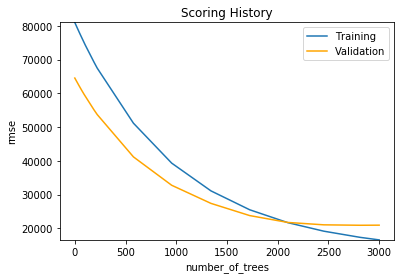

In [59]:
model_gb.plot()

In [60]:
model_gb.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 549436483.254009
RMSE: 23440.061502777866
MAE: 15431.207424823711
RMSLE: 0.12180147061317294
Mean Residual Deviance: 549436483.254009


In [61]:
pred_gb = model_gb.predict(test).as_data_frame()

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [70]:
# Porównanie wyników z obu modeli
plt.scatter(pred_gb.values, df_test['SalePrice'], alpha = 0.3)
plt.scatter(pred_rf.values, df_test['SalePrice'], color = 'red', alpha = 0.2)
plt.plot([0,700000], [0,700000], 'r--')
plt.title("Predicted vs Actuals")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

plt.grid() # dodaję siatkę żeby było lepiej widać

#### błąd procentowy RMSPE

In [83]:
yp = pred_gb.values
y = df_test['SalePrice'].values

In [ ]:
rmspe = np.sqrt(np.sum(((yp-y)/y)**2)/len(y))
rmspe

In [89]:
pred_gb.varim_plot(20)

12.707942144686694

## Metoda Randomized search

Definiujemy siatkę parametrów i budujemy kilka losowych kominacji. Powinniśmy określić albo ile modeli chcemy zbudować, albo czas jaki ma działąć model

In [91]:
from h2o.grid import H2OGridSearch

In [100]:
# siatka parametrów

gbm_params = {
    'ntrees' : [500, 1000, 2000, 3000],
    'max_depth': list(range(5,12)),
    'sample_rate' : [0.4, 0.6, 0.8],
    'learn_rate' : [i * 0.001 for i in range(1,101, 10)],
}

# kryteria poszukiwań (dodajemy to jeżeli chcemy szukać losowo)
search_criteria = {'strategy' : 'RandomDiscrete',
                  'max_models' : 20}

In [103]:
gbm_grid = H2OGridSearch(H2OGradientBoostingEstimator, # estymator
                gbm_params,
             'gbm_grid',           # nazwa naszej siatki
             search_criteria)

In [104]:
gbm_grid.train(x = X,
               y = 'SalePrice',
               training_frame = train,
               validation_frame = val)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [105]:
gbm_grid.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 623352326.2837276
RMSE: 24967.024778369723
MAE: 16818.487116933553
RMSLE: 0.1380668656170398
Mean Residual Deviance: 623352326.2837276

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 550000294.8058715
RMSE: 23452.085084398605
MAE: 15326.870250370815
RMSLE: 0.12304894787287265
Mean Residual Deviance: 550000294.8058715

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 532053241.76637375
RMSE: 23066.279322126786
MAE: 15474.293762776519
RMSLE: 0.11580617311064072
Mean Residual Deviance: 532053241.76637375

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 566241925.5811043
RMSE: 23795.838408871085
MAE: 15743.641095593839
RMSLE: 0.1183775559446918
Mean Residual Deviance: 566241925.5811043

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 504413433.8346479
RMSE: 22459.150336436323
MAE: 15351.027533106031
RMSLE: 0.1149525871595353
Mean Residual Deviance: 504413433.8346479



{'gbm_grid_model_17': ,
 'gbm_grid_model_11': ,
 'gbm_grid_model_12': ,
 'gbm_grid_model_13': ,
 'gbm_grid_model_0': ,
 'gbm_grid_model_10': ,
 'gbm_grid_model_3': ,
 'gbm_grid_model_8': ,
 'gbm_grid_model_2': ,
 'gbm_grid_model_7': ,
 'gbm_grid_model_1': ,
 'gbm_grid_model_9': ,
 'gbm_grid_model_16': ,
 'gbm_grid_model_14': ,
 'gbm_grid_model_4': ,
 'gbm_grid_model_19': ,
 'gbm_grid_model_5': ,
 'gbm_grid_model_15': ,
 'gbm_grid_model_6': ,
 'gbm_grid_model_18': }

In [108]:
gbm_grid.get_grid(sort_by = 'rmse')

                learn_rate max_depth ntrees sample_rate          model_ids  \
0                    0.001         7   2000         0.6  gbm_grid_model_17   
1                    0.001         6   3000         0.4  gbm_grid_model_11   
2                    0.011         9   3000         0.8  gbm_grid_model_12   
3                    0.091         8   3000         0.8  gbm_grid_model_13   
4                    0.041        10   3000         0.8   gbm_grid_model_0   
5                    0.021        10   3000         0.8  gbm_grid_model_10   
6                    0.021         9   1000         0.8   gbm_grid_model_3   
7     0.051000000000000004         9    500         0.6   gbm_grid_model_8   
8                    0.081         7   1000         0.6   gbm_grid_model_2   
9     0.051000000000000004         8   3000         0.6   gbm_grid_model_7   
10                   0.011         6   3000         0.6   gbm_grid_model_1   
11     0.07100000000000001         9   2000         0.6   gbm_gr

In [111]:
# Wybieramy najlepszy model
gbm_best = gbm_grid.get_grid(sort_by = 'rmse').models[0]

In [112]:
gbm_best.varimp_plot(20)

## Sieć neuronowa

Za pomocą H2O możemy zbudować też wielowarstwową jednokierunkową sieć neuronową (ang. multilayer feed-forward network).

In [113]:
from h2o.estimators import H2ODeepLearningEstimator

In [115]:
help(H2ODeepLearningEstimator)

Help on class H2ODeepLearningEstimator in module h2o.estimators.deeplearning:

class H2ODeepLearningEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Deep Learning
 |  
 |  Build a Deep Neural Network model using CPUs
 |  Builds a feed-forward multilayer artificial neural network on an H2OFrame
 |  
 |  Examples
 |  --------
 |    >>> import h2o
 |    >>> from h2o.estimators.deeplearning import H2ODeepLearningEstimator
 |    >>> h2o.connect()
 |    >>> rows = [[1,2,3,4,0], [2,1,2,4,1], [2,1,4,2,1], [0,1,2,34,1], [2,3,4,1,0]] * 50
 |    >>> fr = h2o.H2OFrame(rows)
 |    >>> fr[4] = fr[4].asfactor()
 |    >>> model = H2ODeepLearningEstimator()
 |    >>> model.train(x=range(4), y=4, training_frame=fr)
 |  
 |  Method resolution order:
 |      H2ODeepLearningEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.utils.backward_compatibility.BackwardsCompatibleBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |

In [118]:
model_nn = H2ODeepLearningEstimator(epochs = 10, # ile epok ma zostać wykonanych?
                                   hidden = [100, 100], # definiujemy liczbę warstw ukrytych i liczbę neuronów w warstwach, tu dwie warsty po 100 neuronów
                                   rate = 0.05) # ręcznie ustawiamy szybkość uczenia

model_nn.train(x = X,
               y = 'SalePrice',
               training_frame = train,
               validation_frame = val)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [119]:
model_nn.plot()

In [ ]:
model_nn.model_performance(test)

In [ ]:
pred_nn = model_nn.predict(test).as_data_frame()

plt.scatter(pred_nn.values, df_test['SalePrice'], alpha = 0.36)

plt.plot([0,700000], [0,700000], 'r--')
plt.title("Predicted vs Actuals")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

plt.grid() 